# Hacktiv8 Introduction to Python - Sesi 9

Sesi 9:

- Regression Model

## Simple Linear Regression With scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
#input data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
#show data 
print(x, y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] [ 5 20 14 32 22 38]


In [4]:
#membuat instance class linear regression
model = LinearRegression()

In [6]:
#parameter build model 
model.fit(x, y)

LinearRegression()

In [7]:
#menghitung nilai optimal dari nilai b
model = LinearRegression().fit(x, y)

In [8]:
#buat nilai R square
r_sq = model.score(x, y)

In [10]:
r_sq
print ('coefficient of determination,', r_sq)

coefficient of determination, 0.715875613747954


In [11]:
#coefficient dari model
model.coef_

array([0.54])

In [12]:
model.intercept_

5.633333333333329

In [13]:
#predict dependent variable
y_pred = model.predict(x)

y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

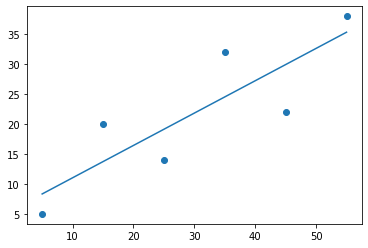

In [14]:
#plotting scatter
plt.scatter(x, y)
plt.plot(x, y_pred)

In [15]:
#memprediksi responde /nilai dependen variable 
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [25]:
#memprediki ketika nilai 60 
model.predict([[60]])

array([38.03333333])

In [26]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [27]:
model.predict(x)

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

## Multiple Linear Regression With scikit-learn

In [28]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [30]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [31]:
# fiting linear regression 
model = LinearRegression().fit(x, y)

In [32]:
#return predict dari parameter linear regression
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [33]:
#dari model memprediki nilai y
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [34]:
#memprediksi nilai y dari variable sample 70, 40 
model.predict([[70, 40]])

array([47.01847395])

In [35]:
#membuat data baru dari hadil predict
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression With scikit-learn

In [36]:
#call polynomial
from sklearn.preprocessing import PolynomialFeatures

In [37]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [38]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [39]:
y

array([15, 11,  2,  8, 25, 32])

In [41]:
#x kuadrat
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [42]:
#membuat model dari nilai x terhadap x kuadrat
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [45]:
x_ = transformer.transform(x)

In [46]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [47]:
#build model dg fit linear, dari data yg suda di kuadrat 
model = LinearRegression().fit(x_, y)

In [48]:
#nilai model
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
slope: [-1.32357143  0.02839286]


In [49]:
y_pred = model.predict(x_)
y_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

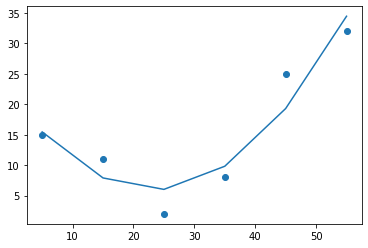

In [50]:
plt.scatter(x, y)
plt.plot(x, y_pred)

## Advanced Linear Regression With statsmodels

In [51]:
import numpy as np
import statsmodels.api as sm

In [52]:
#data input 
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [53]:
print(x, y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] [ 4  5 20 14 32 22 38 43]


In [54]:
# di statsmodel ini define intercept dg return buat kolom baru dr x
x = sm.add_constant(x)

In [55]:
x
#input nya jadi x plus nilai coef

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [56]:
#membuat model ordinal least square model
model = sm.OLS(y, x)        #y terlebih dahulu

In [57]:
#linear fit model
result = model.fit()

In [58]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00713
Time:                        10:01:25   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/Users/prast/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [60]:
#hasil coeffiece
result.rsquared

0.8615939258756777

In [59]:
#predict response dari nilai
print(result.predict(x))
print(result.fittedvalues)

[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [61]:
#prediksi terhadap nilai
result.predict([[1, 0, 1]])

array([5.77760476])

In [62]:
#hasil prediksi dg input variable baru barupa bilangan 1 -10
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
#call outputnya 
y_new = result.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Implementing Linear Regression on Real Dataset

### Using Statsmodels

In [63]:
import statsmodels.api as sm
from sklearn import datasets

data = datasets.load_boston()

In [64]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [66]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [72]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [67]:
X = df['RM']
y = target['MEDV']

In [76]:
#model OLS dg stastsmodel
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          3.74e-256
Time:                        21:06:21   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'predictions' is not defined

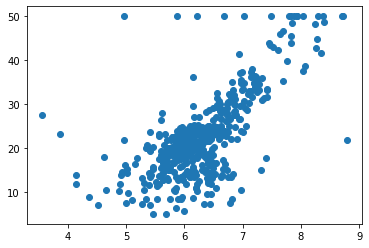

In [68]:
# ploting
plt.scatter(X, y)
plt.plot(X, predictions)

### Using SKLearn

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

data = datasets.load_boston()

In [70]:
#read data frame
df = pd.DataFrame(data.data, columns=data.feature_names)

#define var target ( dependent var)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [71]:
# rewrite as X dan y
X = df
y = target['MEDV']

In [72]:
#panggil linear regression
#membuat linear fit
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [73]:
#prediction dari model yg sudah ada terhadat data X
predictions = model.predict(X)

In [74]:
model.score(X, y)

0.7406426641094095

ValueError: x and y must be the same size

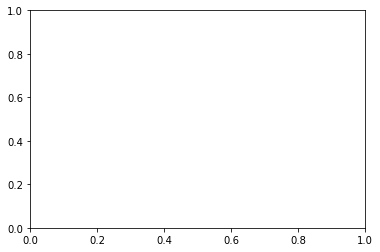

In [76]:
# ploting 
plt.scatter(X, predictions)


### Using SKLearn with Split

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
#call dataset, membuat data frame, 
#use column only horesepower and price
df = pd.read_csv('datasets/CarPrice_Assignment.csv',
                 usecols=['horsepower', 'price'])

In [80]:
#see data frame
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [81]:
#lihat shape data 
df.shape

(205, 2)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    int64  
 1   price       205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


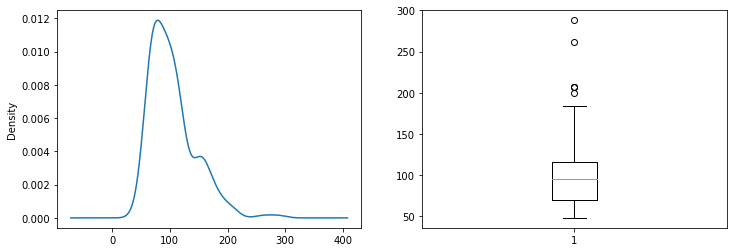

In [83]:
#visualize data 

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

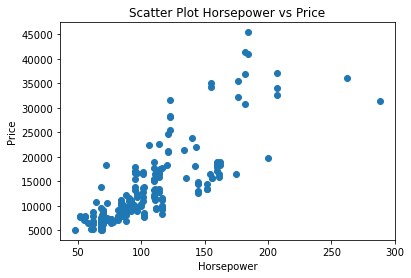

In [84]:
#menggunakan scatter plot
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [85]:
#rewrite become X dan y
X = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [86]:
#membuat train sama test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
X_train.shape

(164, 1)

In [88]:
X_test.shape

(41, 1)

In [89]:
#call model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
# nilai intercept dan nilai coeficience
model.intercept_, model.coef_

(array([-3448.71326203]), array([[158.41476375]]))

In [92]:
#
model.score(X_test, y_test)

0.541244029341839

In [93]:
##predict nilai price ketika horsepower 100
model.predict([[100]])

array([[12392.76311272]])

In [94]:
#predict nilai price ketika horsepower 200
model.predict([[200]])

array([[28234.23948748]])

In [95]:
#predict nilai price dari data X_test (0.2)
y_pred = model.predict(X_test)

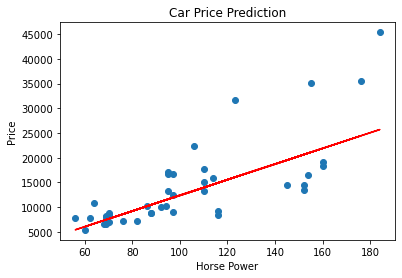

In [96]:
#plotting model terhadap data 
plt.scatter(X_test, y_test)         #
plt.plot(X_test, y_pred, c='r')   
plt.title('Car Price Prediction')
plt.xlabel('Horse Power')
plt.ylabel('Price')

plt.show()

## Linear Regression with Data from Kaggle

In [97]:
df = pd.read_csv('datasets/winequality-red.csv')

In [98]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
X = df.drop(['quality'], axis=1).values
y = df['quality'].values.reshape(-1,1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [137]:
model = LinearRegression()